In [1]:
import pandas as pd



In [2]:
test_data = pd.read_csv("test_8i3B3FC.csv")


In [3]:
test_data.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [4]:
train_data = pd.read_csv("train_NIR5Yl1.csv")

In [5]:
train_data.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [6]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    # Filter columns with 1 < unique values < 50 for display purposes
    df = df[[col for col in df if 1 < nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)

    # Ensure nGraphRow is an integer using math.ceil()
    nGraphRow = math.ceil(nCol / nGraphPerRow)

    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


In [8]:
import matplotlib.pyplot as plt

def plotCorrelationMatrix(df, graphWidth, dataframeName="Dataset"):
    """
    Plots a correlation matrix for the given DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        graphWidth (int): The width of the graph.
        dataframeName (str): Optional name of the dataset for the title.
    """
    # Select only numeric columns
    df = df.select_dtypes(include=['number'])

    # Drop columns with NaN values and keep only those with more than 1 unique value
    df = df.dropna(axis='columns')  # Drop columns with NaN values
    df = df[[col for col in df if df[col].nunique() > 1]]  # Keep columns with > 1 unique value

    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of numeric, non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return

    # Compute correlation matrix
    corr = df.corr()

    # Plot correlation matrix
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {dataframeName}', fontsize=15)
    plt.show()


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plotScatterMatrix(df, plotSize, textSize):
    # Keep only numerical columns
    df = df.select_dtypes(include=[np.number])

    # Remove columns with NaN values
    df = df.dropna(axis='columns')  # Use 'axis' keyword argument to specify columns

    # Keep columns where there are more than 1 unique value
    df = df[[col for col in df if df[col].nunique() > 1]]

    columnNames = list(df)
    if len(columnNames) > 10:  # Limit columns for better visualization
        columnNames = columnNames[:10]
    df = df[columnNames]

    # Create scatter matrix plot
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')

    # Add correlation coefficients
    corrs = df.corr().values
    for i, j in zip(*np.triu_indices_from(corrs, k=1)):
        ax[i, j].annotate(
            f'Corr. coef = {corrs[i, j]:.3f}',
            (0.8, 0.2),
            xycoords='axes fraction',
            ha='center',
            va='center',
            size=textSize
        )

    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [10]:
nRowsRead = 1000

df1 = pd.read_csv('test_8i3B3FC.csv', delimiter=',', nrows=nRowsRead)
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 1000 rows and 6 columns


In [11]:
df1.head(5)

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


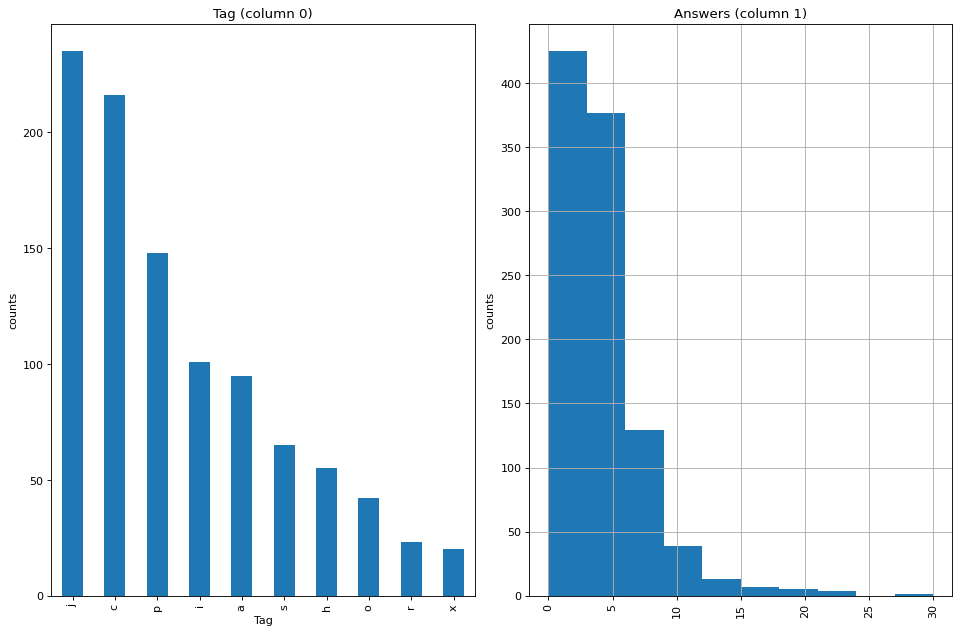

In [12]:
plotPerColumnDistribution(df1, 10, 5)

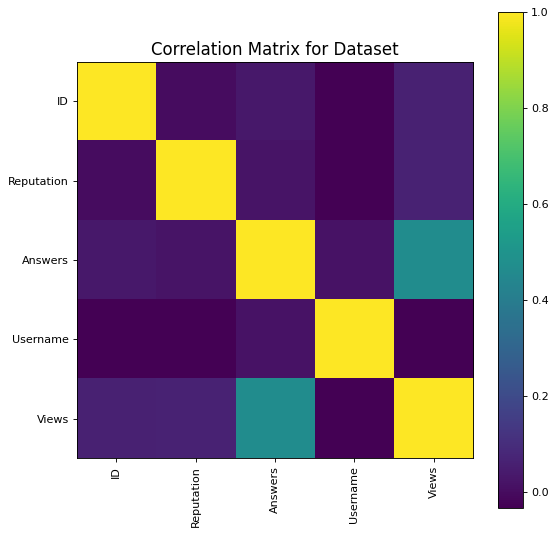

In [13]:
plotCorrelationMatrix(df1, 8)

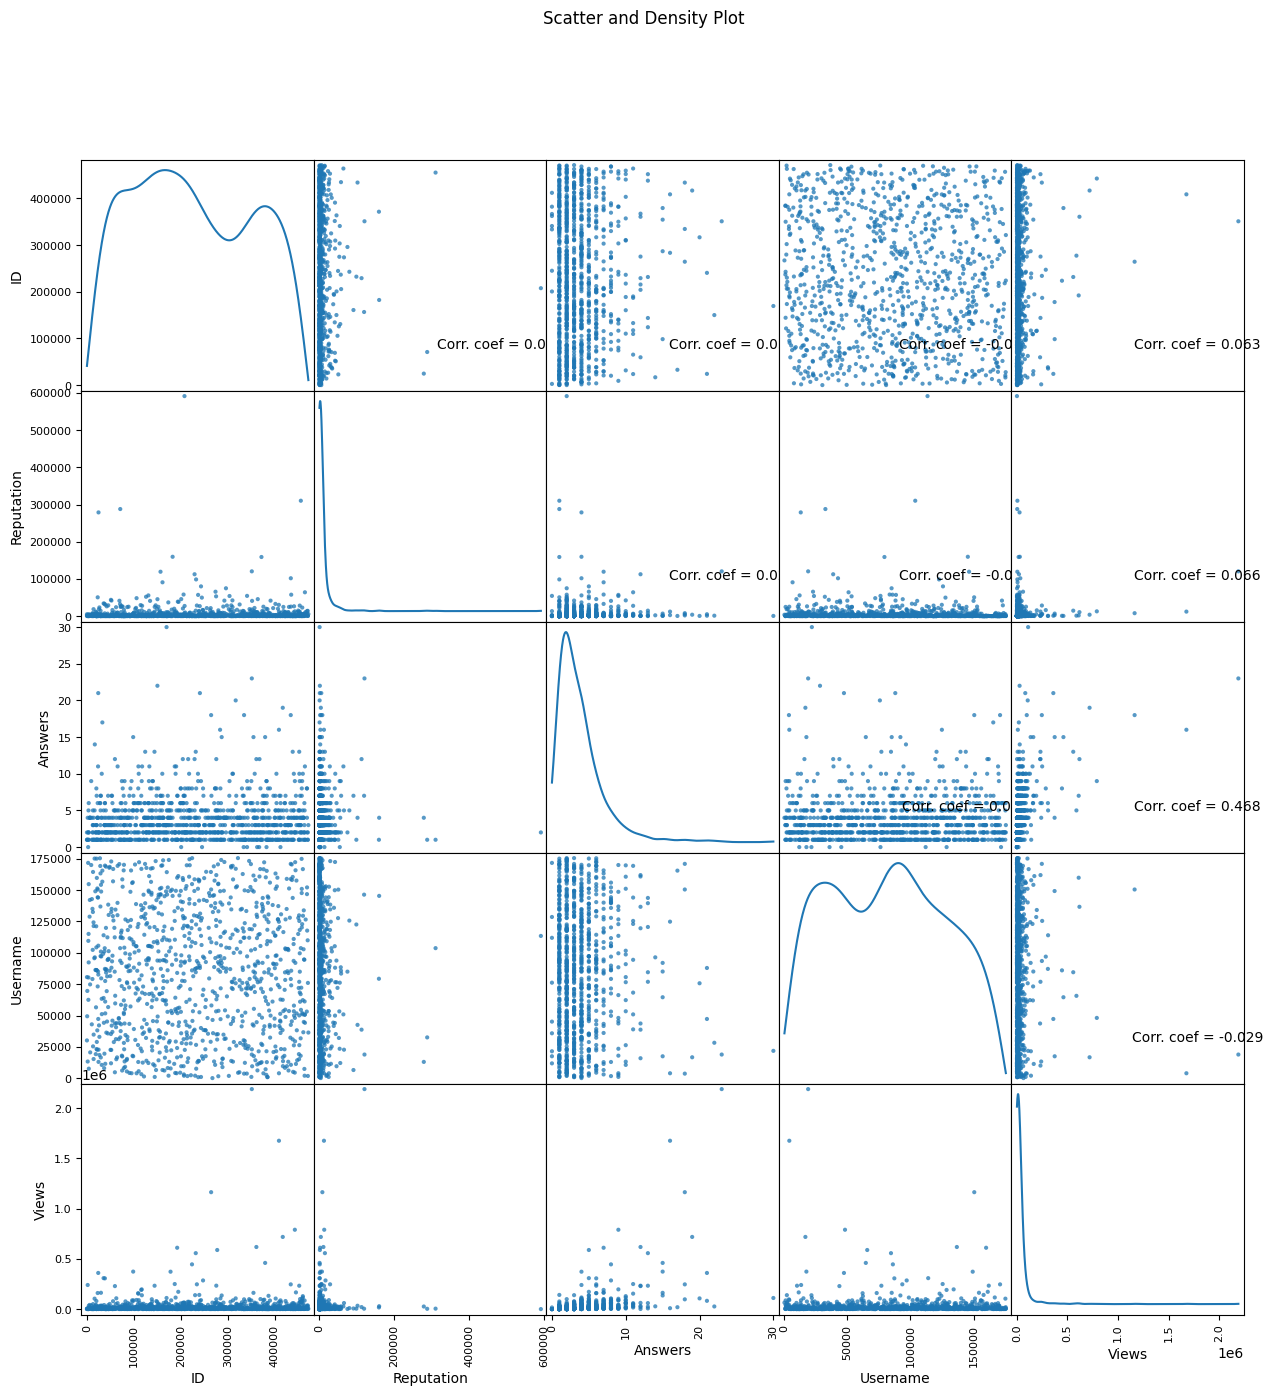

In [14]:
plotScatterMatrix(df1, 15, 10)

In [15]:
nRowsRead = 1000

df2 = pd.read_csv('train_NIR5Yl1.csv',delimiter=',',nrows=nRowsRead)
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 1000 rows and 7 columns


In [16]:
df2.head(5)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


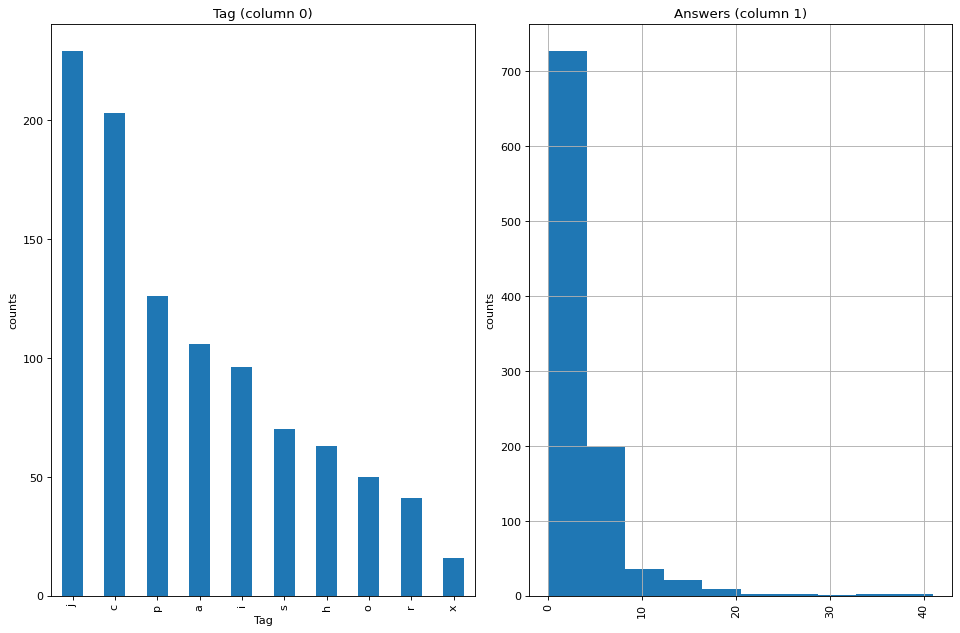

In [17]:
plotPerColumnDistribution(df2,10,5)


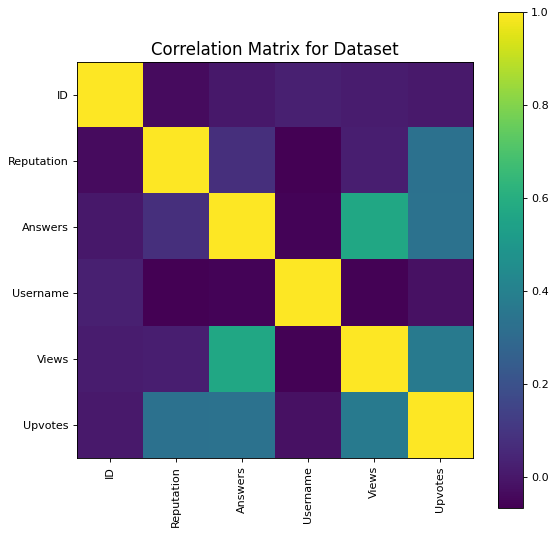

In [18]:
plotCorrelationMatrix(df2, 8)

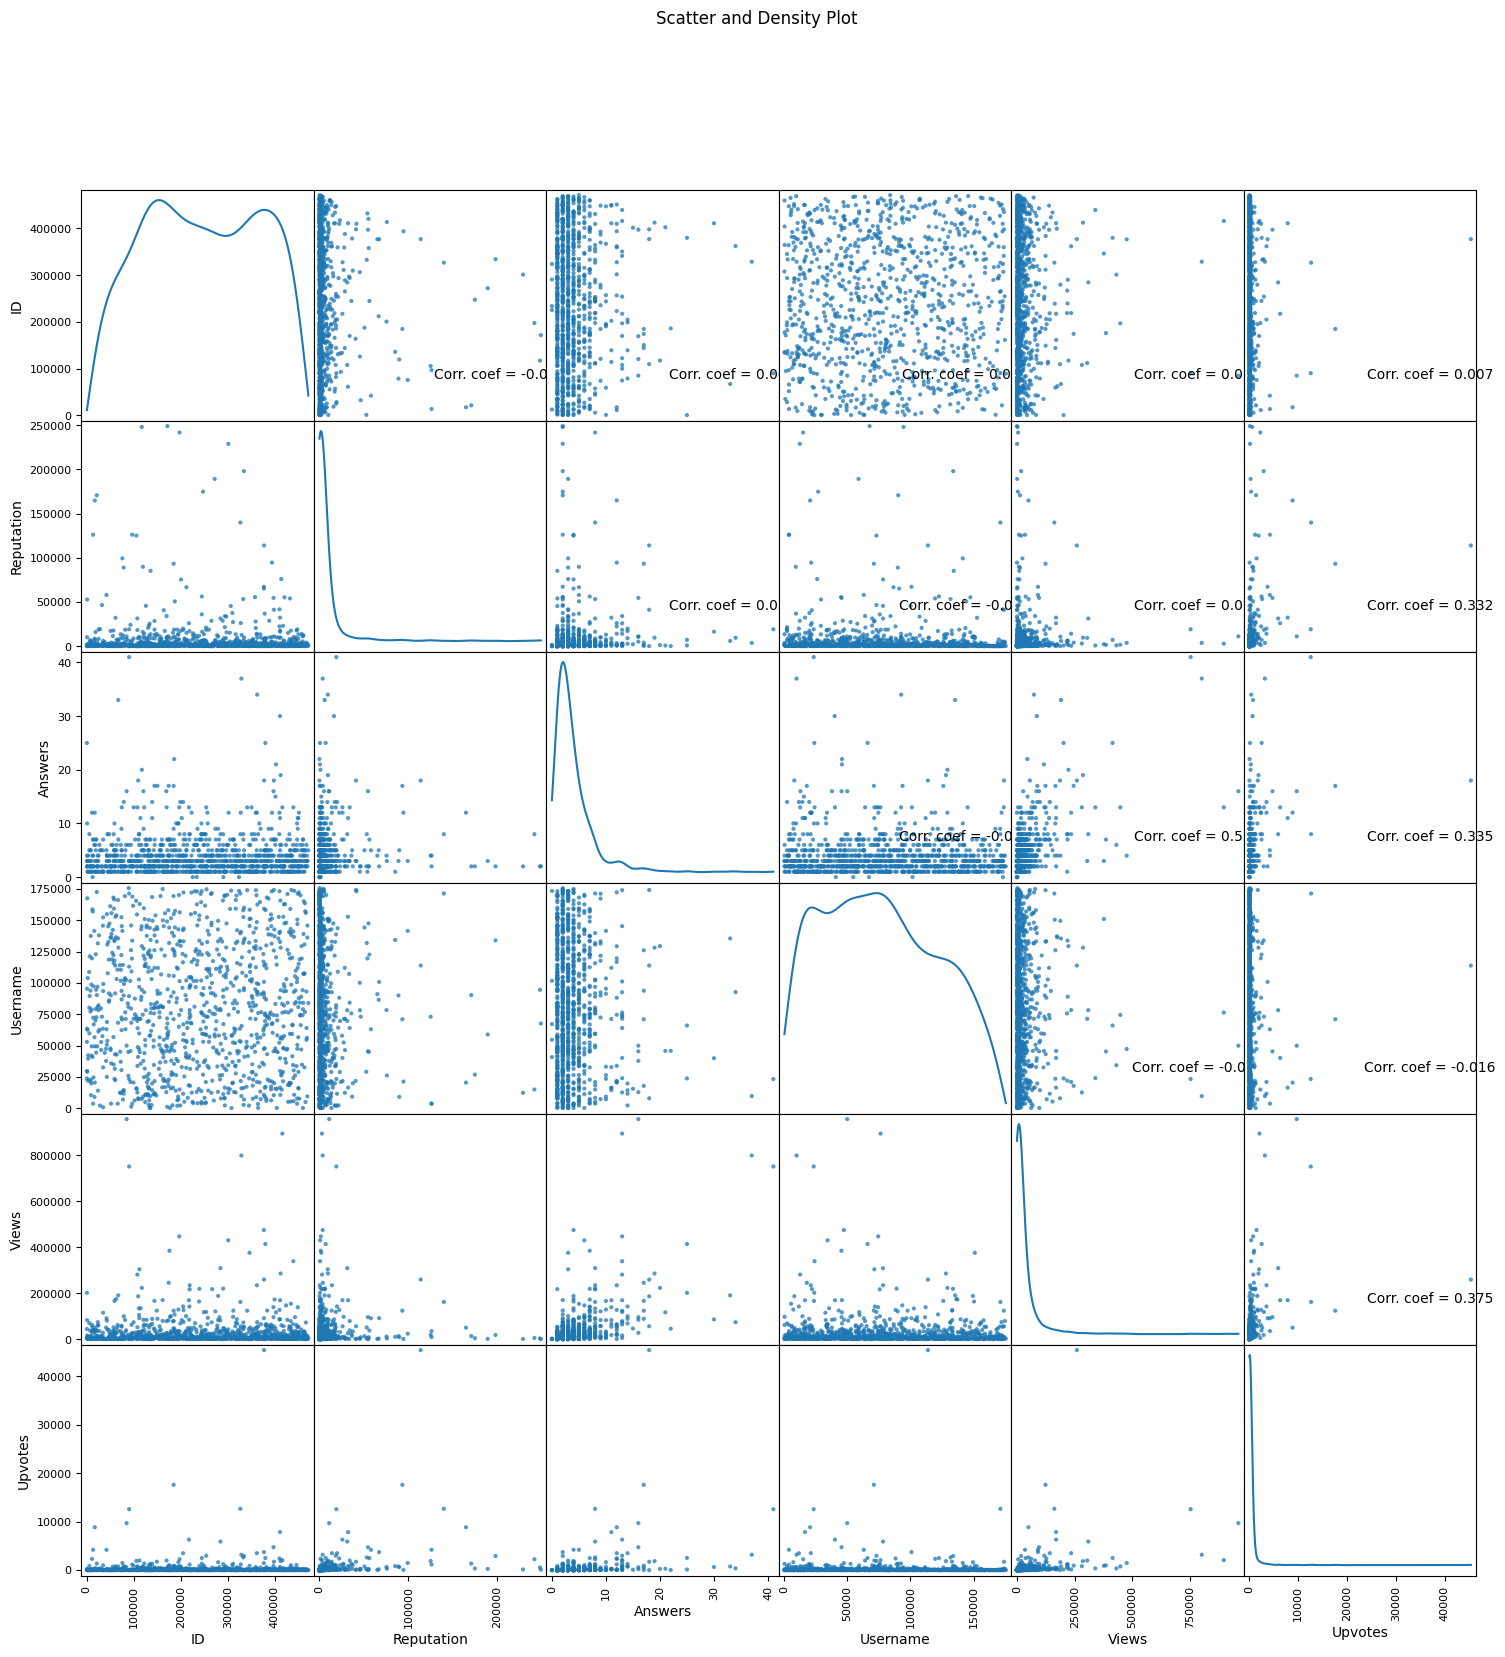

In [19]:
plotScatterMatrix(df2,18,10)

In [20]:
train_data = train_data.dropna()
test_data = test_data.dropna()

train_data = pd.get_dummies(train_data, drop_first=True)
test_data = pd.get_dummies(test_data, drop_first=True)

test_data = test_data.reindex(columns=train_data.columns, fill_value=0)



In [21]:
X = train_data.drop('Upvotes',axis=1)
y = train_data['Upvotes'] # that is my target column

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Example: Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Example: Random Forest
# model = RandomForestRegressor(random_state=42)
# model.fit(X_train, y_train)


LinearRegression()

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the validation set
y_val_pred = model.predict(X_val)

# Calculate evaluation metrics
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Mean Squared Error: 11951832.30759004
R-squared Score: 0.22132158336676366


In [25]:
X_test = test_data.drop('Upvotes', axis=1, errors='ignore')  # Ensure 'upvotes' isn't in features
test_data['predicted_upvotes'] = model.predict(X_test)

# Save predictions
test_data[['predicted_upvotes']].to_csv('predicted_upvotes.csv', index=False)


In [26]:
test_data.head(50)

,ID,Reputation,Answers,Username,Views,Upvotes,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x,predicted_upvotes
0,366953,5645.0,3.0,50652,33200.0,0,False,False,False,False,False,False,False,False,False,392.174721
1,71864,24511.0,6.0,37685,2730.0,0,True,False,False,False,False,False,False,False,False,229.899341
2,141692,927.0,1.0,135293,21167.0,0,False,False,True,False,False,False,False,False,False,187.857938
3,316833,21.0,6.0,166998,18528.0,0,False,False,True,False,False,False,False,False,False,-130.138955
4,440445,4475.0,10.0,53504,57240.0,0,False,False,True,False,False,False,False,False,False,653.115300
5,3514,3252.0,1.0,115109,2307.0,0,True,False,False,False,False,False,False,False,False,-276.503432
6,331420,859.0,1.0,88355,6507.0,0,False,False,False,False,False,False,False,False,True,-146.591306
7,406540,770.0,4.0,74489,57775.0,0,True,False,False,False,False,False,False,False,False,622.741431
8,227379,8727.0,2.0,37904,4459.0,0,False,False,False,False,False,False,False,True,False,-45.464519
9,331687,170.0,4.0,162810,4899.0,0,False,False,False,False,False,True,False,False,False,-451.368590


I am starting over here this is the actual implementation


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [28]:
train = pd.read_csv("train_NIR5Yl1.csv")
train.shape


(330045, 7)

In [29]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [30]:
train.isnull().sum()

,0
ID,0
Tag,0
Reputation,0
Answers,0
Username,0
Views,0
Upvotes,0


In [31]:
train.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [32]:
train.drop(['ID','Username'],inplace = True, axis = 1)
train.head()

,Tag,Reputation,Answers,Views,Upvotes
0,a,3942.0,2.0,7855.0,42.0
1,a,26046.0,12.0,55801.0,1175.0
2,c,1358.0,4.0,8067.0,60.0
3,a,264.0,3.0,27064.0,9.0
4,c,4271.0,4.0,13986.0,83.0


In [33]:
# Views Vs Answer
df_mean = train.groupby('Tag').mean()
df_mean

,Reputation,Answers,Views,Upvotes
Tag,,,,
a,6065.168102,4.259189,31800.916327,316.460136
c,10566.420657,4.047697,26746.676875,327.569916
h,6985.072116,3.778837,33948.958812,384.719704
i,5238.884290,3.679753,15806.680093,117.386636
j,8285.527730,4.347256,43291.211236,540.364686
o,5656.755603,3.380654,13504.645538,112.157294
p,8062.053033,3.977077,33184.984334,407.351971
r,5290.282109,2.304292,12033.055940,79.027246
s,6545.661622,3.600866,25807.082965,237.031385


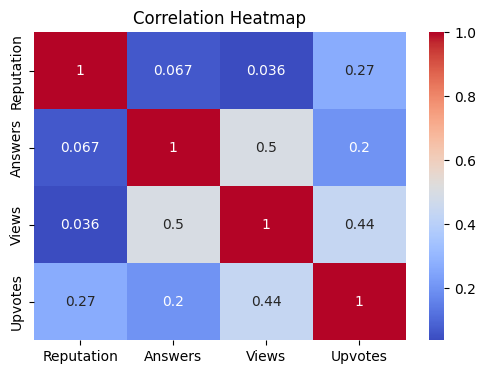

In [34]:
# Filter numeric columns
numeric_train = train.select_dtypes(include=['number'])

# Compute correlation matrix
cmap = numeric_train.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cmap, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

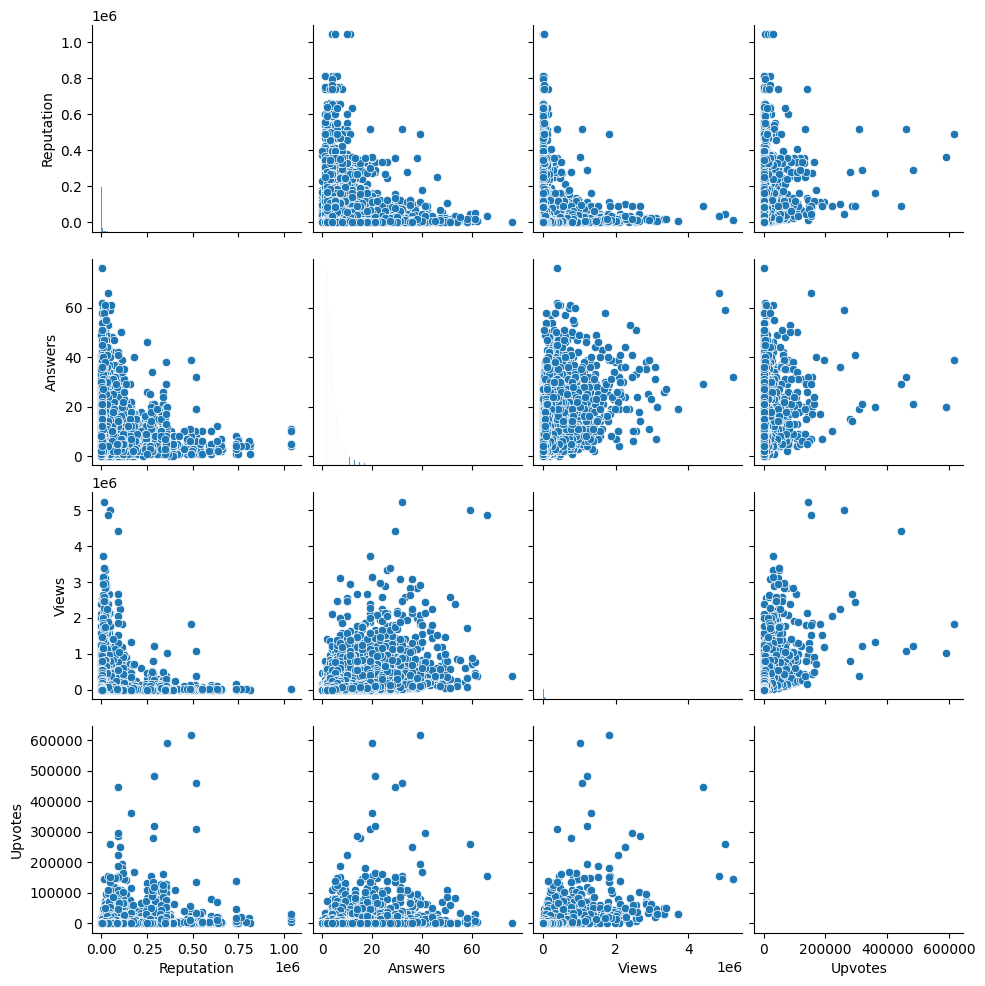

In [35]:
sns.pairplot(train)

Text(0, 0.5, 'Views')

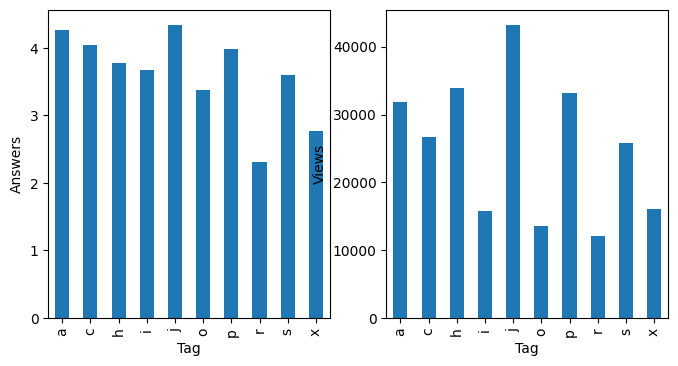

In [38]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
df_mean["Answers"].plot(kind = 'bar')
plt.ylabel("Answers")
plt.subplot(1,2,2)
df_mean["Views"].plot(kind = 'bar')
plt.ylabel("Views")


In [39]:
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=4)
pd_watched = bn.transform([train['Answers']])[0]
train['pd_watched'] = pd_watched
print(type(train))
train.head()

<class 'pandas.core.frame.DataFrame'>


,Tag,Reputation,Answers,Views,Upvotes,pd_watched
0,a,3942.0,2.0,7855.0,42.0,0.0
1,a,26046.0,12.0,55801.0,1175.0,1.0
2,c,1358.0,4.0,8067.0,60.0,0.0
3,a,264.0,3.0,27064.0,9.0,0.0
4,c,4271.0,4.0,13986.0,83.0,0.0


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Tag'] = le.fit_transform(train['Tag'])
train.head()

,Tag,Reputation,Answers,Views,Upvotes,pd_watched
0,0,3942.0,2.0,7855.0,42.0,0.0
1,0,26046.0,12.0,55801.0,1175.0,1.0
2,1,1358.0,4.0,8067.0,60.0,0.0
3,0,264.0,3.0,27064.0,9.0,0.0
4,1,4271.0,4.0,13986.0,83.0,0.0


<Axes: xlabel='Tag', ylabel='Upvotes'>

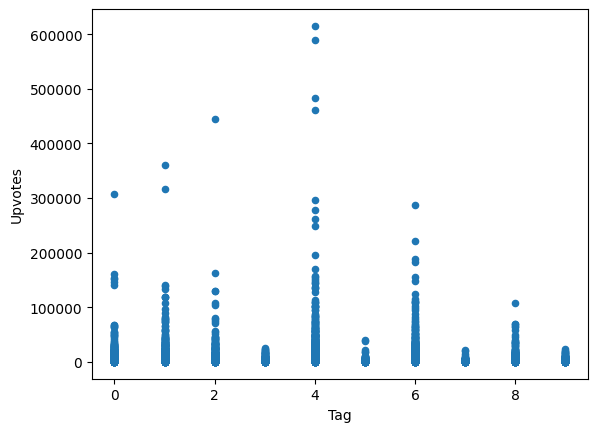

In [43]:
train.plot('Tag','Upvotes',kind="scatter")
# if we look at the graph below we can see that some tags have higher upvotes


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

feature_names = [x for x in train.columns if x not in ['Upvotes']]
x_train, x_val, y_train, y_val = train_test_split(train[feature_names],y,test_size=0.22, random_state=205)

sc_X = StandardScaler()
x_train - sc_X.fit_transform(x_train)
x_val = sc_X.transform(x_val)



In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly_reg = PolynomialFeatures(degree = 4, interaction_only=False, include_bias=True)
X_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(x_train,y_train)
lin_reg_1 =  linear_model.LassoLars(alpha=0.021, max_iter=150)
lin_reg_1.fit(X_poly, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:755: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 39 iterations, alpha=5.393e+17, previous alpha=5.198e+17, with an active set of 14 regressors.
  warnings.warn(


LassoLars(alpha=0.021, max_iter=150)

In [50]:
from sklearn.metrics import r2_score
pred = poly_reg.fit_transform(x_val)
pred_val = lin_reg_1.predict(pred)

print(r2_score(y_val,pred_val))


-0.0014463680830019143


In [53]:
test = pd.read_csv('test_8i3B3FC.csv')
ID = test['ID']

test.drop(['ID','Username'], axis=1, inplace=True)

le_test = LabelEncoder()
test['Tag'] = le_test.fit_transform(test['Tag'])
test.head()

,Tag,Reputation,Answers,Views
0,0,5645.0,3.0,33200.0
1,1,24511.0,6.0,2730.0
2,3,927.0,1.0,21167.0
3,3,21.0,6.0,18528.0
4,3,4475.0,10.0,57240.0


In [54]:
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=4)
pd_watched = bn.transform([test['Answers']])[0]
test['pd_watched'] = pd_watched
print(type(test))
test.head()

<class 'pandas.core.frame.DataFrame'>


,Tag,Reputation,Answers,Views,pd_watched
0,0,5645.0,3.0,33200.0,0.0
1,1,24511.0,6.0,2730.0,1.0
2,3,927.0,1.0,21167.0,0.0
3,3,21.0,6.0,18528.0,1.0
4,3,4475.0,10.0,57240.0,1.0


In [55]:
test = sc_X.transform(test)


In [56]:
pred_test= poly_reg.fit_transform(test)
pred_imp = lin_reg_1.predict(pred_test)

In [57]:
pred_imp = abs(pred_imp)


In [58]:
sub = pd.DataFrame({'ID':ID, "Upvotes":pred_imp})
sub.to_csv('Upvote_prediction_3.csv',index=False)